In [1]:
# install packages
install.packages('tidyverse')
install.packages('magrittr')
install.packages('lubridate')
install.packages('iNEXT')
install.packages('vegan')
install.packages('networkD3')
install.packages('permute')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘permute’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘htmlwidgets’, ‘igraph’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library('tidyverse')
library('magrittr')
library('lubridate')
library('iNEXT')
library('vegan')
library('networkD3')
library('permute')

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7



In [15]:
# lendo o arquivo de entrada

df <- read_csv("Phoridae.csv")%>% 
  pivot_longer(!c(points,area, rivers), names_to = "Espécie", values_to = "Abundância") 

df <- df %>% group_by(area, rivers, Espécie) %>%
  summarise(Abundância = sum(Abundância))

distinct(df, area)

Rows: 28 Columns: 121

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): points, area, rivers
dbl (118): Megaselia_notipennis, Megaselia_picta, Megaselia_luteicauda, Mega...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

`summarise()` has grouped output by 'area', 'rivers'. You can override using the `.groups` argument.



area,rivers
<chr>,<chr>
ARE,pelotas
COR,corrientes
DCO,corrientes
FOZ,turucu
GAL,pelotas
PEL,pelotas
TUR,turucu


In [16]:
# top 5 specie

top_specie <- df %>% arrange(-Abundância) %>% 
  filter(Abundância > 219) 

Run 0 stress 0.06298233 
Run 1 stress 0.06298214 
... New best solution
... Procrustes: rmse 0.0002374599  max resid 0.0004054352 
... Similar to previous best
Run 2 stress 0.06346894 
... Procrustes: rmse 0.2716749  max resid 0.4506258 
Run 3 stress 0.06346894 
... Procrustes: rmse 0.2716762  max resid 0.4506299 
Run 4 stress 0.06346894 
... Procrustes: rmse 0.271676  max resid 0.4506289 
Run 5 stress 0.1403585 
Run 6 stress 0.06346894 
... Procrustes: rmse 0.2716749  max resid 0.4506254 
Run 7 stress 0.1577918 
Run 8 stress 0.06298231 
... Procrustes: rmse 0.0005436608  max resid 0.000930981 
... Similar to previous best
Run 9 stress 0.1403585 
Run 10 stress 0.06165148 
... New best solution
... Procrustes: rmse 0.03731101  max resid 0.06276479 
Run 11 stress 0.06346895 
Run 12 stress 0.06346894 
Run 13 stress 0.0629821 
Run 14 stress 0.06346894 
Run 15 stress 0.06346894 
Run 16 stress 0.06346894 
Run 17 stress 0.06165147 
... New best solution
... Procrustes: rmse 4.252661e-05  max 

Too few points to calculate an ellipse

Too few points to calculate an ellipse

Too few points to calculate an ellipse



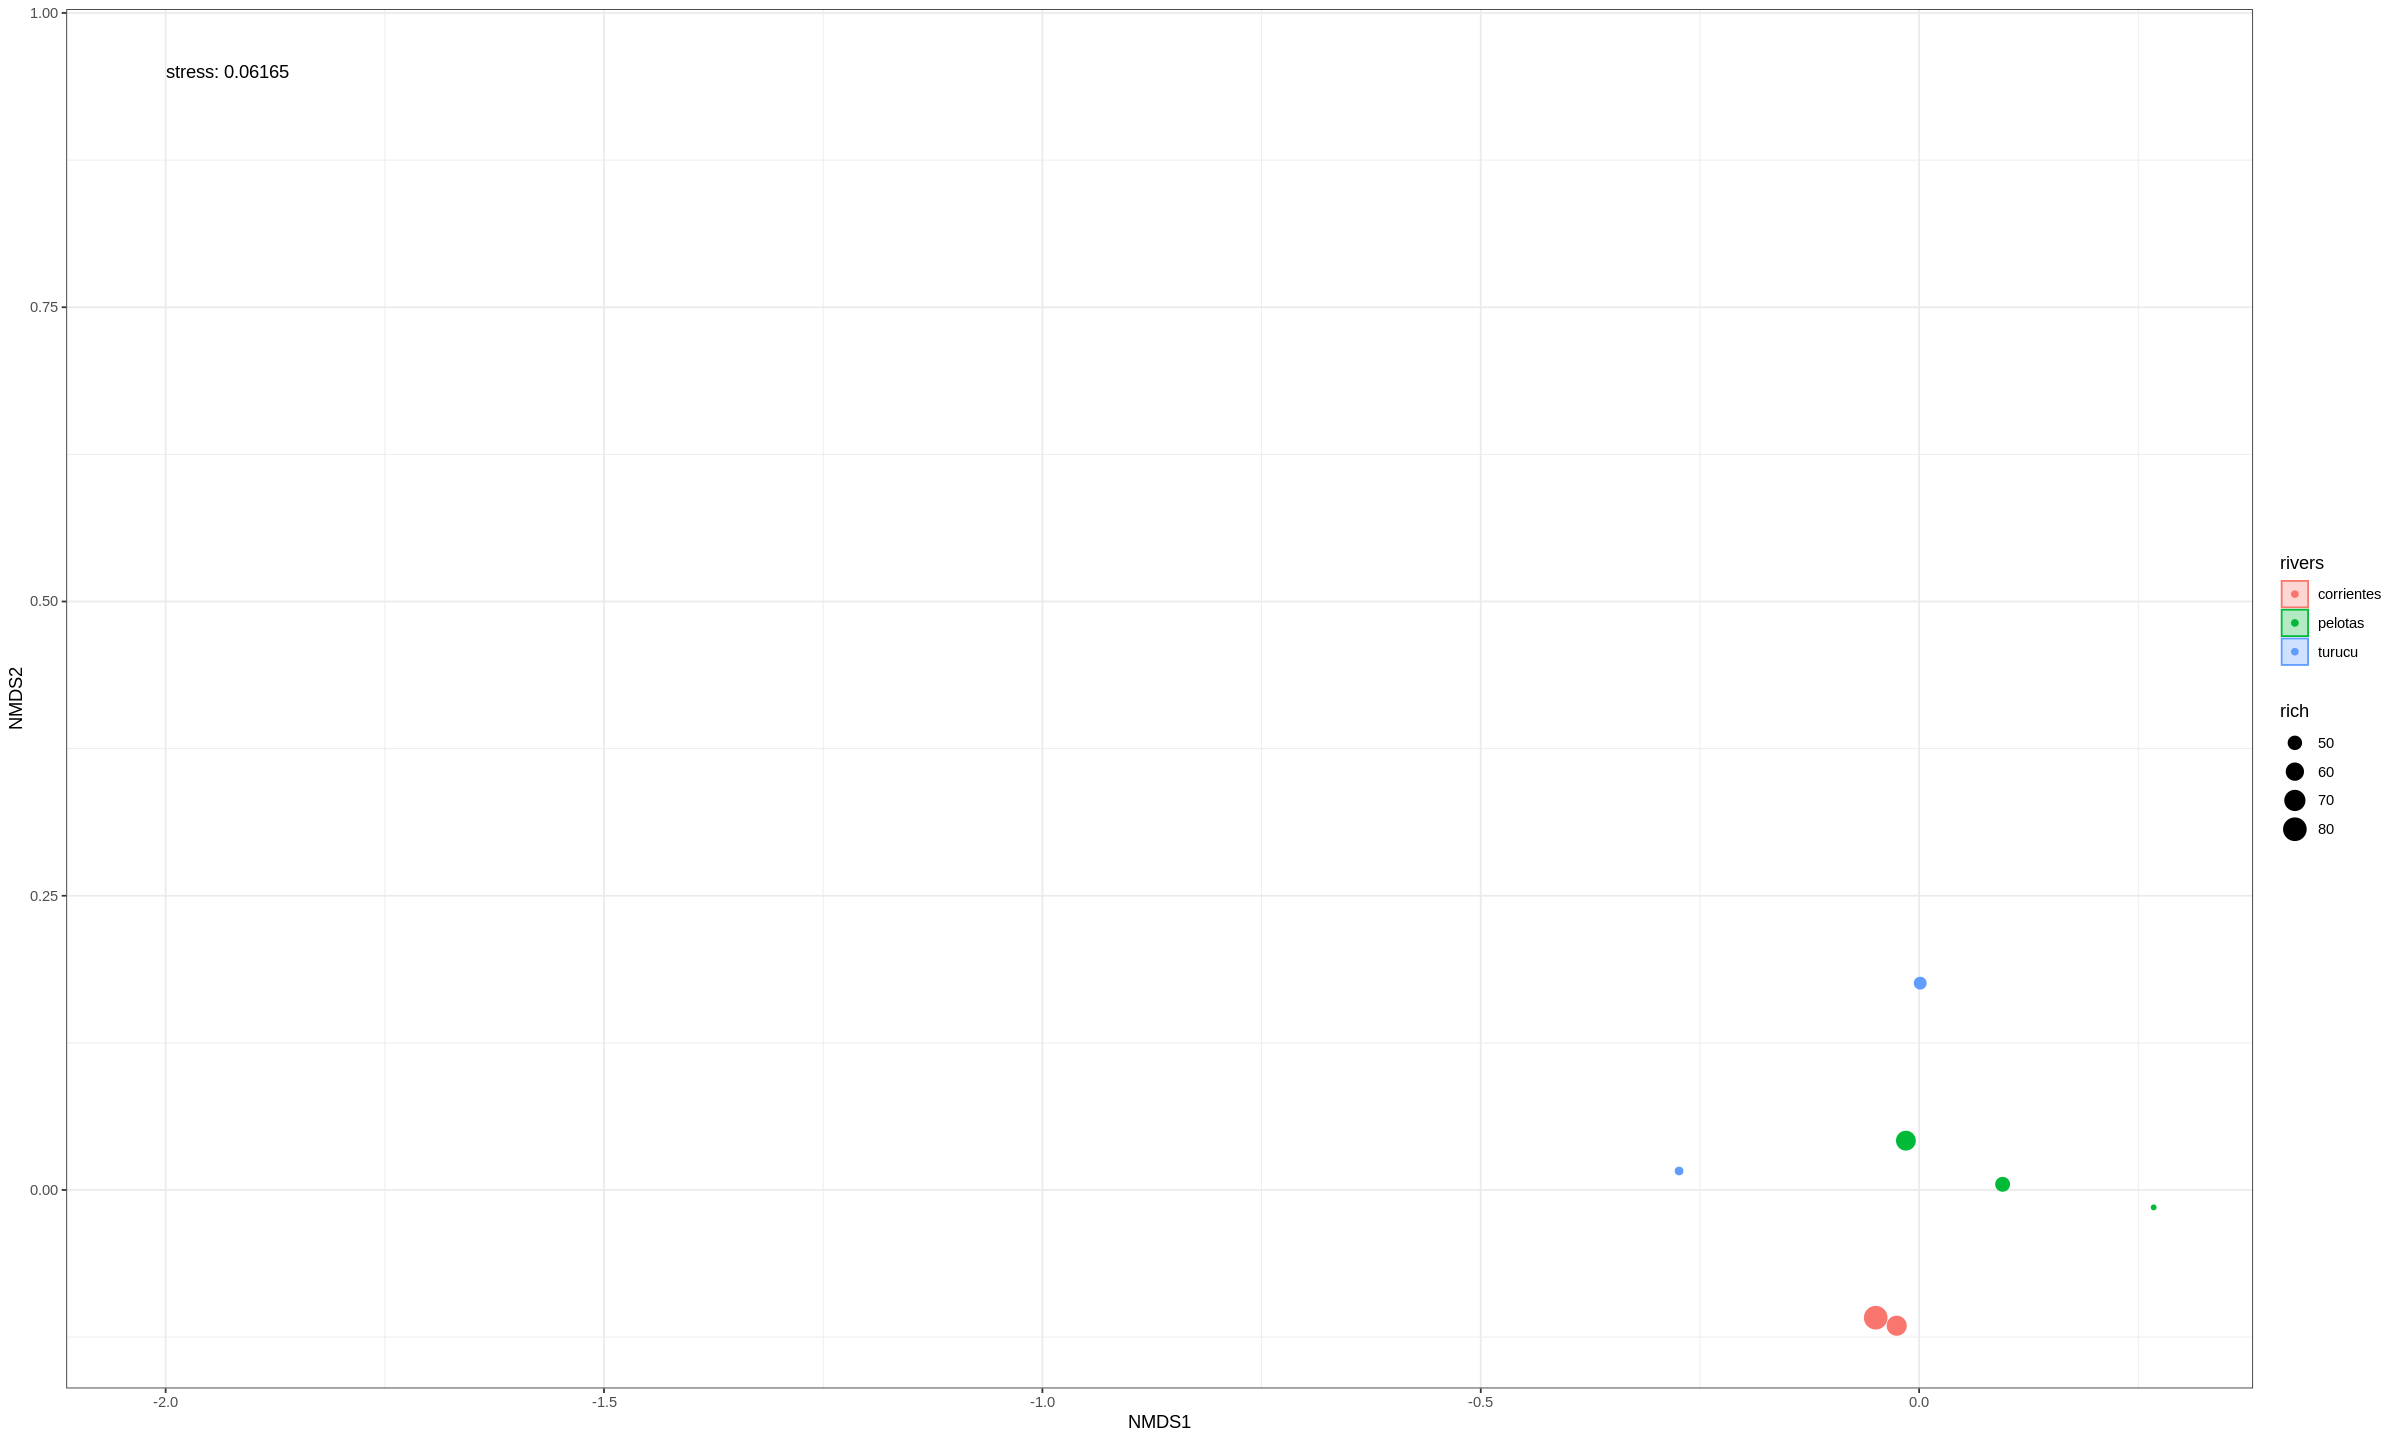

In [17]:
# NMDS

rich <- df  %>%  
  group_by(area) %>% 
  filter(Abundância > 0) %>%
  summarise(rich = n_distinct(Espécie))

data_nmds <- df %>%
  group_by(Espécie, area) %>%
  pivot_wider(names_from = Espécie, values_from = Abundância) %>%
  mutate(
    across(everything(), ~ replace_na(.x, 0))
  ) %>% left_join(rich, by = "area")


run_nmds <- data_nmds

run_nmds$area <- NULL
run_nmds$rivers <- NULL
run_nmds$rich <- NULL

dist_bray <- vegdist(run_nmds, method = "bray", binary = TRUE)

nmds <- metaMDS(dist_bray)

options(repr.plot.width=20, repr.plot.height=12)

scores(nmds)  %>%
  as_tibble() %>%
  cbind(data_nmds) %>%
  as_tibble()%>%
  ggplot(aes(x = NMDS1, y = NMDS2)) +
  geom_point(aes(size = rich, color = rivers)) +
  stat_ellipse(geom = "polygon", aes(group = rivers, color = rivers, fill = rivers), alpha = 0.3) +
  annotate("text", x = -2, y = 0.95, label = paste0("stress: ", format(nmds$stress, digits = 4)), hjust = 0) +
  theme_bw()


## Entre as áreas não deu diferença, porém entre os rios sim

In [18]:
## Permanova

adonis(dist_bray~data_nmds$area, permutations = 1000)



Set of permutations < 'minperm'. Generating entire set.




Call:
adonis(formula = dist_bray ~ data_nmds$area, permutations = 1000) 

Permutation: free
Number of permutations: 5039

Terms added sequentially (first to last)

               Df SumsOfSqs MeanSqs F.Model R2 Pr(>F)
data_nmds$area  6   0.50213       0       0  1      1
Residuals       0   0.00000     Inf          0       
Total           6   0.50213                  1       

In [19]:
adonis(dist_bray~data_nmds$rivers, permutations = 1000)

Set of permutations < 'minperm'. Generating entire set.




Call:
adonis(formula = dist_bray ~ data_nmds$rivers, permutations = 1000) 

Permutation: free
Number of permutations: 5039

Terms added sequentially (first to last)

                 Df SumsOfSqs  MeanSqs F.Model      R2   Pr(>F)   
data_nmds$rivers  2   0.24831 0.124155  1.9566 0.49451 0.004995 **
Residuals         4   0.25382 0.063455         0.50549            
Total             6   0.50213                  1.00000            
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

`geom_smooth()` using formula 'y ~ x'



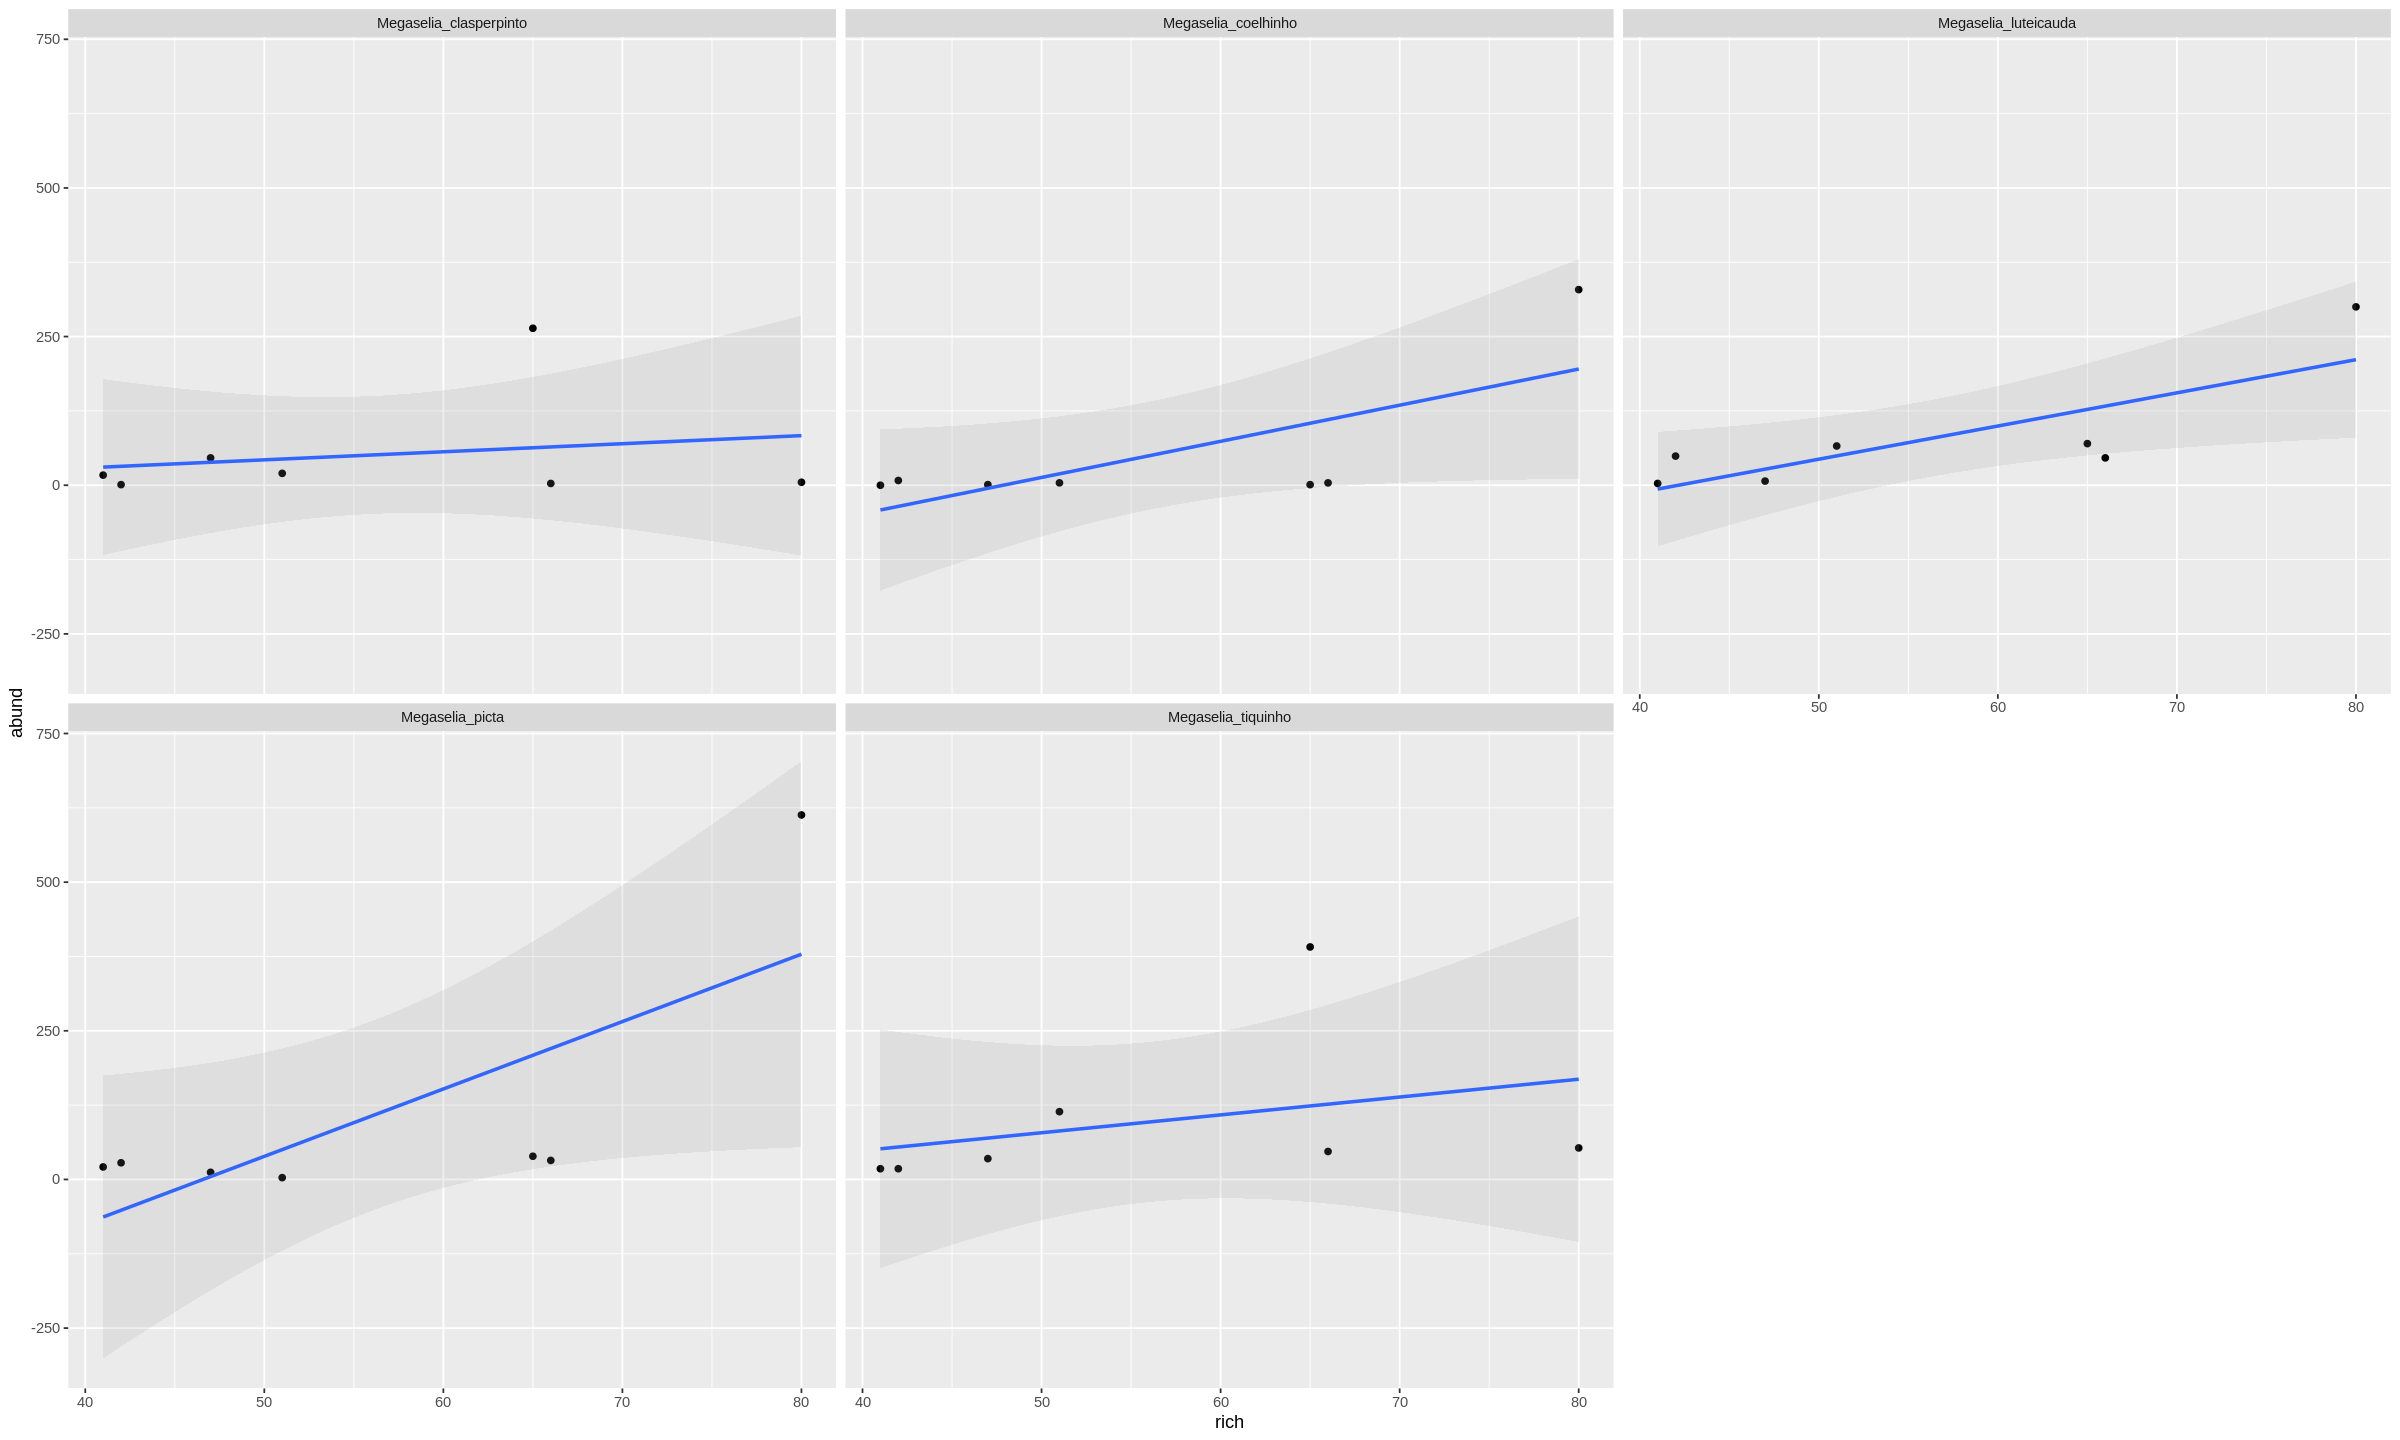

In [20]:
# Rich x Abund

rich_abund <- data_nmds %>% 
  pivot_longer(!c(area, rich, rivers), names_to = "Espécie", values_to = "abund") %>% 
  filter(Espécie %in% top_specie$Espécie)

options(repr.plot.width=20, repr.plot.height=12)

ggplot(rich_abund, aes(x = rich, y = abund)) +
  geom_point() +
  geom_smooth(method = "lm", alpha = .15) +
  facet_wrap(~Espécie)


In [21]:
# Diversidade

abund <- df %>%
  group_by(Espécie, area) %>%
  summarise(Abundância = sum(Abundância)) %>%
  pivot_wider(names_from = area, values_from = Abundância)  %>%
  replace_na(list(`ARE` = 0, `COR` = 0, `DCO` = 0, `FOZ` =  0, `PEL` = 0,
                  `TUR` = 0)) %>%
  column_to_rownames(var = "Espécie")

resultados <- iNEXT(abund,
  q = c(0, 1, 2),
  datatype = "abundance",
  endpoint = 400
)

`summarise()` has grouped output by 'Espécie'. You can override using the `.groups` argument.



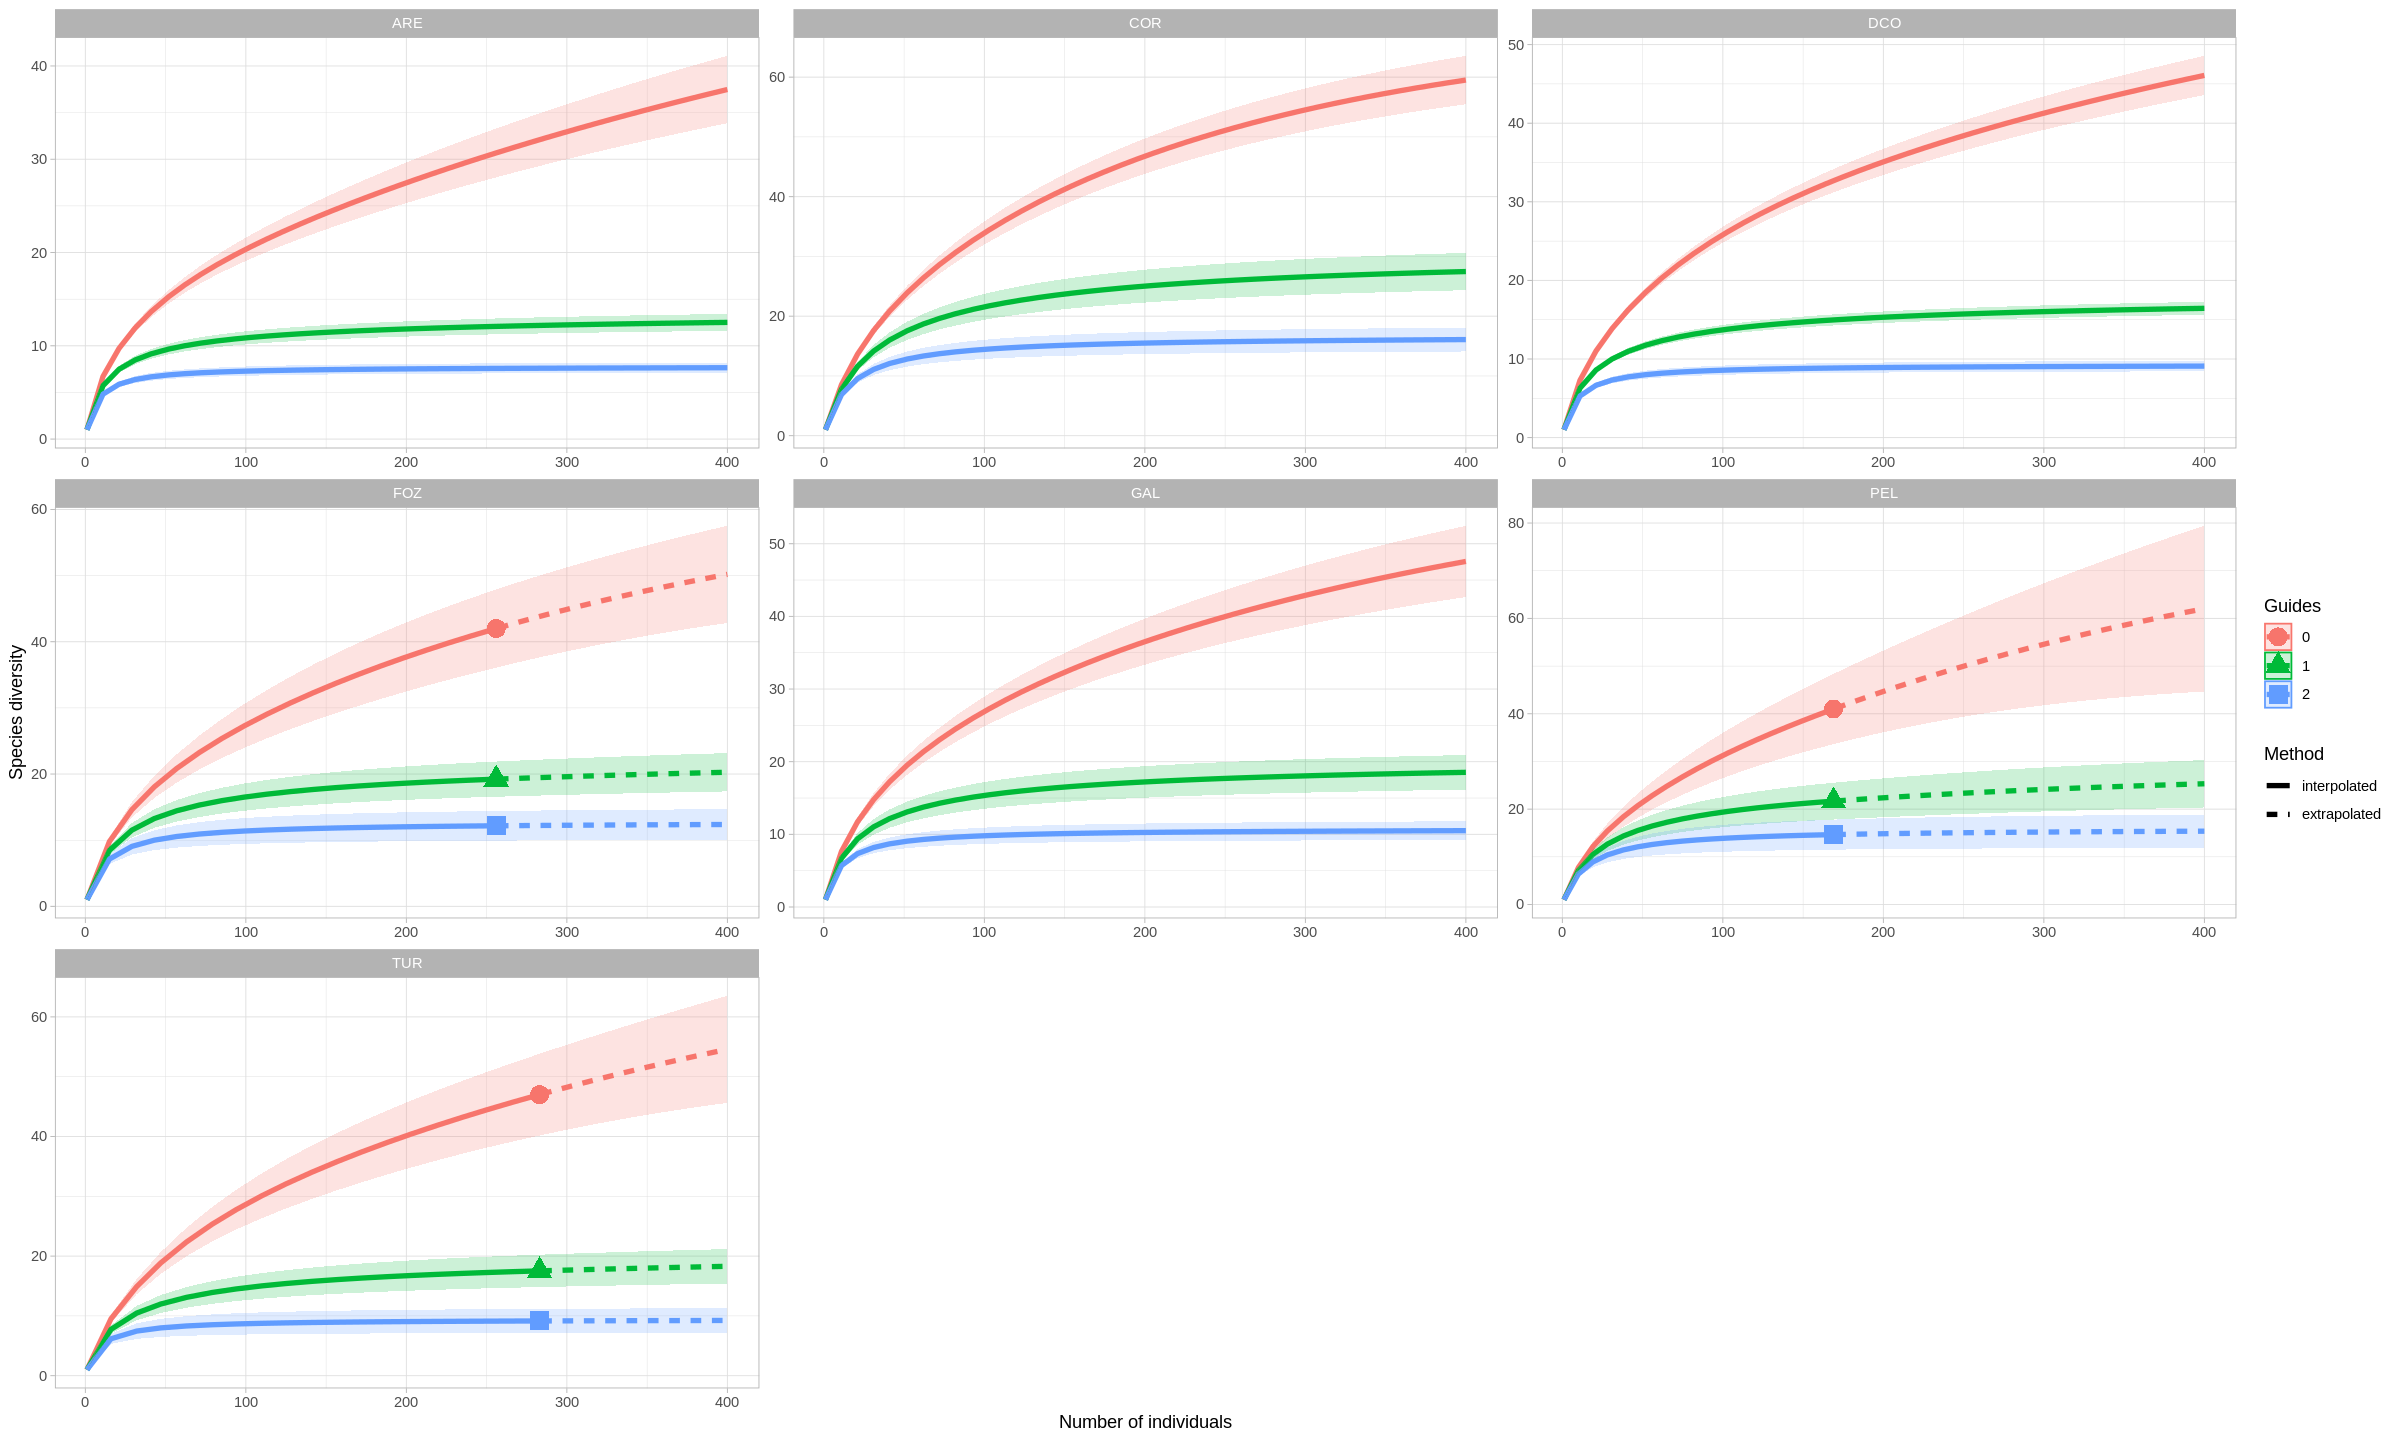

In [22]:
# Resultado 0 = Species richness; 1 = Shannon diversity; 2 = Simpson diversity

options(repr.plot.width=20, repr.plot.height=12)

ggiNEXT(resultados, type = 1, facet.var = 'site') + theme_light() + 
  facet_wrap(~site, ncol=3, scales = 'free') 

